In [1]:
import os.path
import glob

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Using paws_test_yml.py script I created labels for testing set (paws_results.csv) and for all avalible data (paws_results_test_and_training.csv). Now we can compare the "hand created" labels with labels created by PAWS. **

# Testing PAWS on The Testing Set

In [2]:
# paws_results.csv includes true labels and labels created by PAWS for testing set (200 samples)
test = pd.read_csv('paws_results.csv')
test.head()

,Unnamed: 0,Unnamed: 0.1,name,q_Imax,Imax_over_Imean,Imax_over_Ilowq,Imax_over_Ihighq,Imax_sharpness,low_q_ratio,high_q_ratio,...,bad_data_pred,bad_data_prob_true,paws_bad_data,paws_bad_data_pr,paws_form,paws_form_pr,paws_precursor,paws_precursor_pr,paws_structure,paws_structure_pr
0,0,1453,R7/R7_SAXS_0061_dz_bgsub,0.070,54.279213,35.025656,5148.683686,2.072658,0.996221,0.003749,...,False,0.0,False,1.0,True,1.000000,False,0.999993,True,1.000000
1,1,862,R3/R3_cool_0041_dz_bgsub,0.052,32.572613,20.970892,7780.293842,1.664051,0.998494,0.001490,...,False,0.0,False,1.0,True,1.000000,True,0.999893,True,1.000000
2,2,413,R12/R12cooling2rd_0006_dz_bgsub,0.040,15.597771,10.082157,1020.818642,1.026497,0.994472,0.005507,...,False,0.0,False,1.0,True,1.000000,False,1.000000,False,0.999932
3,3,162,R1/R1_addOAC1_0015_dz_bgsub,0.040,18.734042,12.065037,3715.888830,1.036291,0.998166,0.001824,...,False,0.0,False,1.0,True,1.000000,False,1.000000,False,1.000000
4,4,1879,Reaction_G/G_60C_10min_0214163030_0001_dz_bgsub,0.040,3.738025,2.699466,12.156567,1.140351,0.889271,0.109591,...,False,0.0,False,1.0,False,0.999785,True,1.000000,False,1.000000


In [3]:
test.shape

(200, 126)

In [4]:
accuracy_score(test['bad_data'], test['paws_bad_data'])

1.0

In [5]:
accuracy_score(test['form'], test['paws_form'])

0.995

In [7]:
accuracy_score(test['precursor'], test['paws_precursor'])

0.96499999999999997

In [8]:
accuracy_score(test['structure'], test['paws_structure'])

0.995

## bad_data

In [11]:
accuracy_score(test['bad_data'], test['paws_bad_data'])

1.0

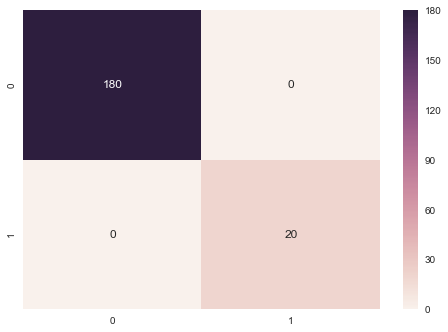

In [12]:
cnf_matrix = confusion_matrix(test['bad_data'], test['paws_bad_data'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

## form_factor_scattering

In [13]:
accuracy_score(test['form'], test['paws_form'])

0.995

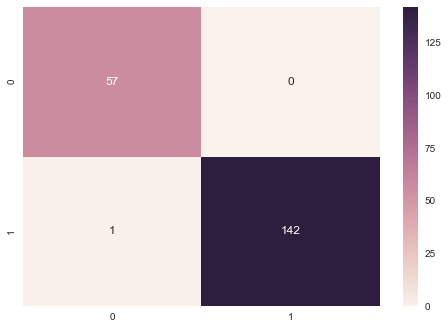

In [14]:
cnf_matrix = confusion_matrix(test['form'], test['paws_form'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

We have 1 false negative:

In [15]:
difference = test[test['form'] != test['paws_form']]
difference[['name', 'str_label','form','paws_form', 'paws_form_pr']]

,name,str_label,form,paws_form,paws_form_pr
195,R5/R5_SAXS_0029_dz_bgsub,form_precursor_,True,False,0.999374


The algorithm is very sure that label should be "False."

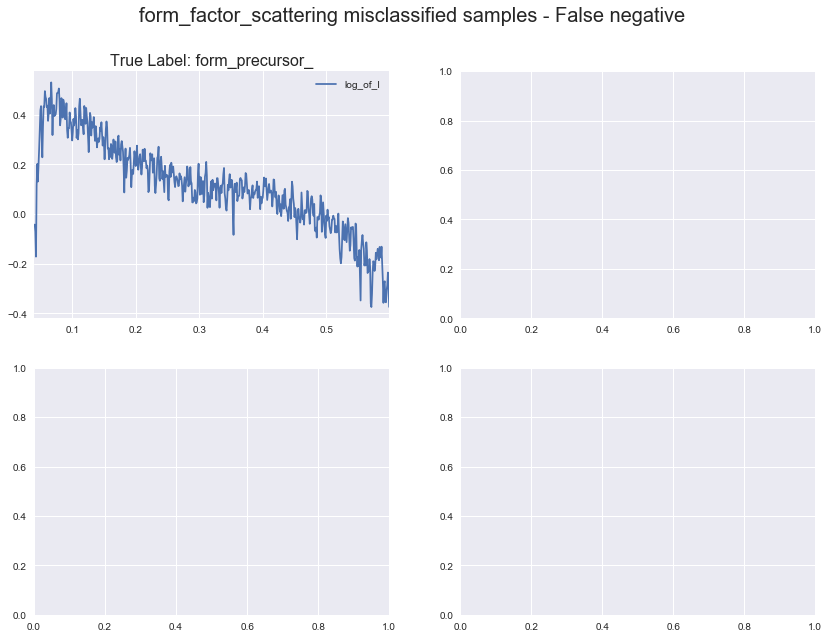

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("form_factor_scattering misclassified samples - False negative", fontsize=20)
st.set_y(0.97)

for n in range(len(difference)): 
    d = difference.iloc[n]
    file_name = difference.iloc[n]['name']
    str_label = difference.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

## precursor_scattering

In [19]:
accuracy_score(test['precursor'], test['paws_precursor'])

0.96499999999999997

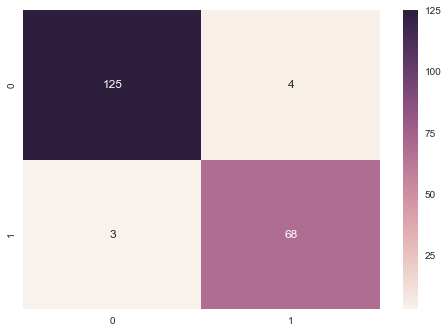

In [20]:
cnf_matrix = confusion_matrix(test['precursor'], test['paws_precursor'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

We have 3 false negative and 4 false positive:

In [21]:
difference = test[test['precursor'] != test['paws_precursor']]
difference[['name', 'str_label','precursor','paws_precursor','paws_precursor_pr']]

,name,str_label,precursor,paws_precursor,paws_precursor_pr
24,R5/R5_SAXS_0048_dz_bgsub,form_precursor_structure,True,False,1.000000
89,Reaction_E/E_270C_0213202445_0001_dz_bgsub,form_precursor_,True,False,0.876005
97,Reaction_H/H_280C_0214203949_0001_dz_bgsub,form_,False,True,0.988614
104,Reaction_H/H_280C_10_0214204821_0001_dz_bgsub,form_,False,True,0.875436
107,R13/R13_0035_dz_bgsub,form_,False,True,0.930468
108,Reaction_B/B_240C_12min_0212160618_0001_dz_bgsub,form_precursor_structure,True,False,0.908581
126,Reaction_A/A_272C_0212115023_0001_dz_bgsub,form_structure,False,True,0.562821


Only for one sample from eight the propability is about 50/50. 

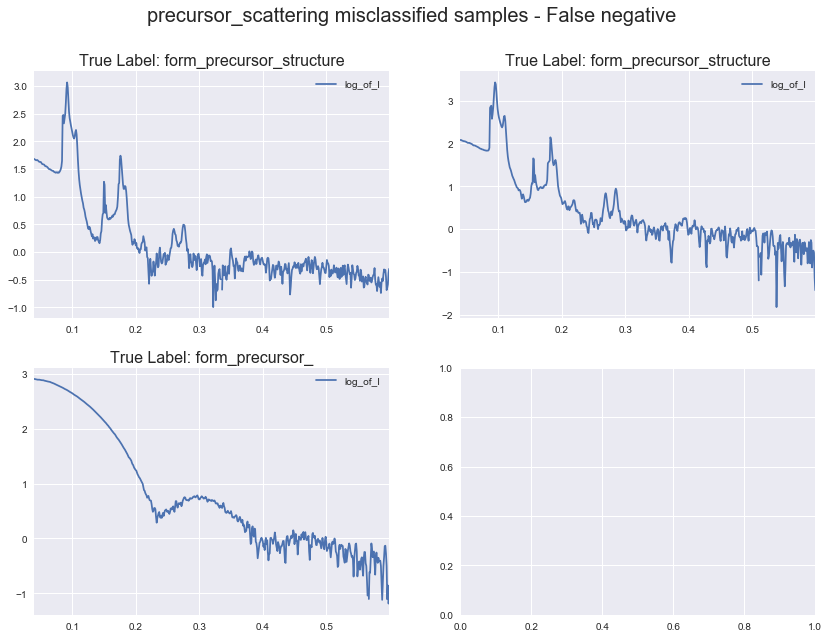

In [23]:
false_negative = difference[difference['precursor'] == True]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("precursor_scattering misclassified samples - False negative", fontsize=20)
st.set_y(0.97)

for n in range(len(false_negative)): 
    d = false_negative.iloc[n]
    file_name = false_negative.iloc[n]['name']
    str_label = false_negative.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

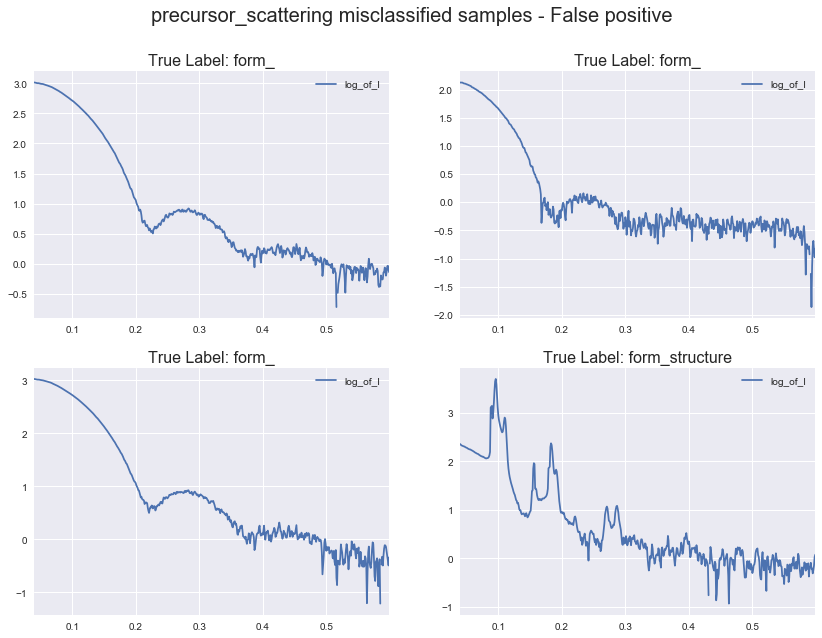

In [25]:
false_positive = difference[difference['precursor'] == False]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("precursor_scattering misclassified samples - False positive", fontsize=20)
st.set_y(0.97)

for n in range(len(false_positive)): 
    d = false_positive.iloc[n]
    file_name = false_positive.iloc[n]['name']
    str_label = false_positive.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label, fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

## diffraction_peaks

In [26]:
accuracy_score(test['structure'], test['paws_structure'])

0.995

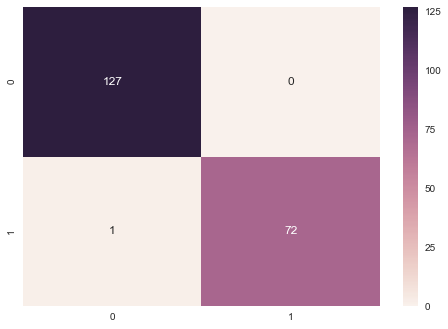

In [27]:
cnf_matrix = confusion_matrix(test['structure'], test['paws_structure'])
sns.heatmap(cnf_matrix, annot=True, fmt='.5g')

In [28]:
difference = test[test['structure'] != test['paws_structure']]
difference[['name', 'str_label','structure','paws_structure', 'paws_structure_pr']]

,name,str_label,structure,paws_structure,paws_structure_pr
181,R2/R2_SAXS_0039_dz_bgsub,form_precursor_structure,True,False,1.0


Again, the algorithm is very sure that the label should be "False."

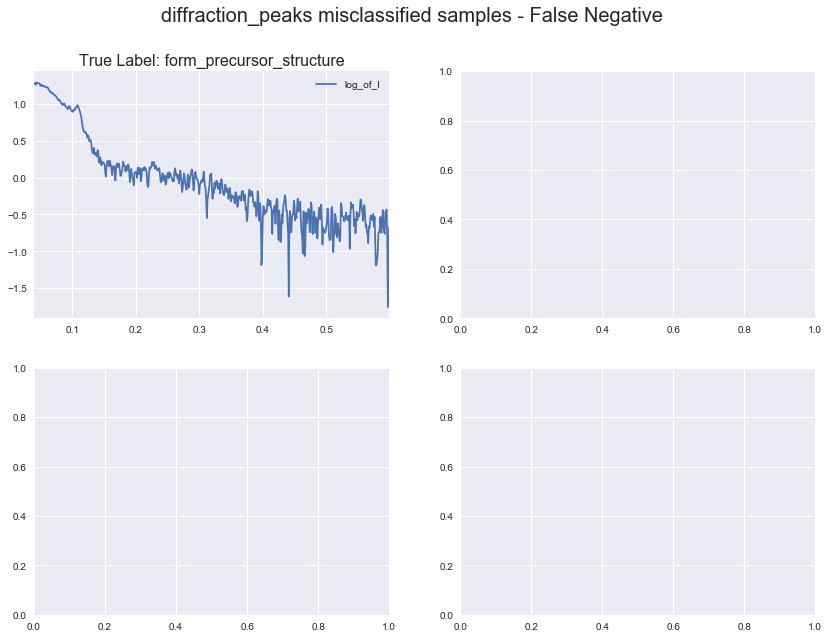

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
st = fig.suptitle("diffraction_peaks misclassified samples - False Negative", fontsize=20)
st.set_y(0.97)

for n in range(len(difference)): 
    d = difference.iloc[n]
    file_name = difference.iloc[n]['name']
    str_label = difference.iloc[n]['str_label']
    df_v = pd.read_csv('2016_saxs_data/' + file_name + '.csv')
    df_v['log_of_I'] = np.log10(df_v[' Intensity (counts)'])
    df_v.plot(x='# q (1/Angstrom)',y='log_of_I', ax=axes[n%2, n//2])
    axes[n%2, n//2].set_title('True Label: ' + str_label , fontsize=16);
    axes[n%2, n//2].xaxis.label.set_visible(False)

### Accuracy of PAWS on the testing set (200 samples)

|            | feature set | accuracy on testing set 
| ------------- | ------------- |----------------
| bad_data  | analytical features + 60 bins strengths  | 1.000 
| form  | 60 bins strengths  | 0.995 
| precursor | analytical features + 60 bins strengths | 0.965 
| structure | analytical features + 60 bins strengths | 0.995 

# Testing PAWS on All Avalible Data (Testing and Training Sets)

In [31]:
# paws_results.csv includes true labels and labels created by PAWS for testing and training sets (1946 samples)
test2 = pd.read_csv('paws_results_test_and_training.csv')

In [33]:
accuracy_score(test2['bad_data'], test2['paws_bad_data'])

0.99331963001027745

In [34]:
accuracy_score(test2['form'], test2['paws_form'])

0.99743062692702977

In [35]:
accuracy_score(test2['precursor'], test2['paws_precursor'])

0.94912641315519009

In [36]:
accuracy_score(test['structure'], test['paws_structure'])

0.995

### Accuracy of PAWS on all avalible data (1946 samples)

|            | feature set | accuracy on testing set 
| ------------- | ------------- |----------------
| bad_data  | analytical features + 60 bins strengths  | 0.993 
| form  | 60 bins strengths  | 0.997 
| precursor | analytical features + 60 bins strengths | 0.949 
| structure | analytical features + 60 bins strengths | 0.995 